# PROJECT 09: CUSTOMER_SEGMENTATION
---

Từ tập dữ liệu thông tin của 200 khách hàng của trung tâm thương mại phân chia các khách hàng đấy vào những phân khúc (cụm) khách hàng phù hợp

File dữ liệu sử dụng:

**Mall_Custemers.csv**: Tập dữ liệu gồm 200 khách hàng với một số thuộc tính:
1. Gender: Giới tính của khách hàng
2. Age: Tuổi của khách hàng
3. Income: Thu nhập hàng năm của khách hàng (k$)
4. Spending score: Điểm chi tiêu do trung tâm mua sắm chỉ định dựa trên hành vi chi tiêu của khách hàng với thang điểm từ 1-100

# 1.Tải và quan sát tập dữ liệu

In [ ]:
# Thực hiện mount tới drive chứa file dữ liệu
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Đọc tập dữ liệu
path = "/content/drive/My Drive/Customer_Segmentation/Mall_Customers.csv"
df = pd.read_csv(path)
print(df.head(10))
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.2000

##1.1 Quan sát thuộc tính tuổi của khách hàng
Loại bỏ cột CustomerID vì không ảnh hưởng đến bài toán

Lập biểu đồ quan sát sự phân bổ tuổi của khách hàng

In [ ]:
# Xóa cột "CustomerID"
df.drop(["CustomerID"], axis = 1, inplace=True)

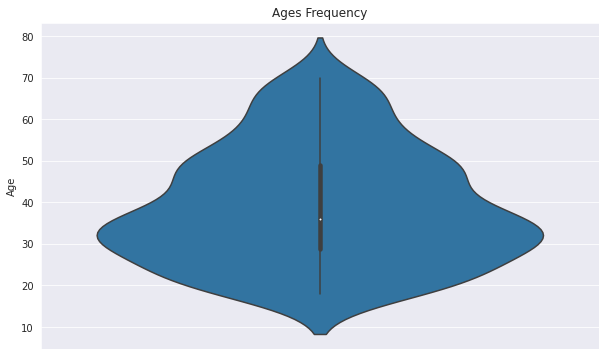

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

Vẽ biểu đồ cột quan sát khách hàng theo từng nhóm tuổi

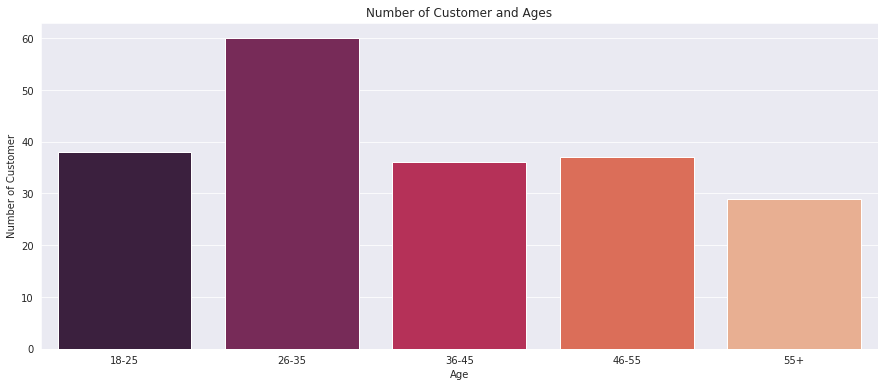

In [ ]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Độ tuổi của khách hàng tối thiểu là 18, tối đa là 30, tuổi trung bình là 38,85 và độ tuổi chủ yếu là từ 26 - 35 tuổi

##1.2 Quan sát thuộc tính thu nhập hàng năm của khách hàng
Vẽ biểu đồ hộp và biểu đồ cột để thấy sự phân bố thu nhập hàng năm của khách hàng

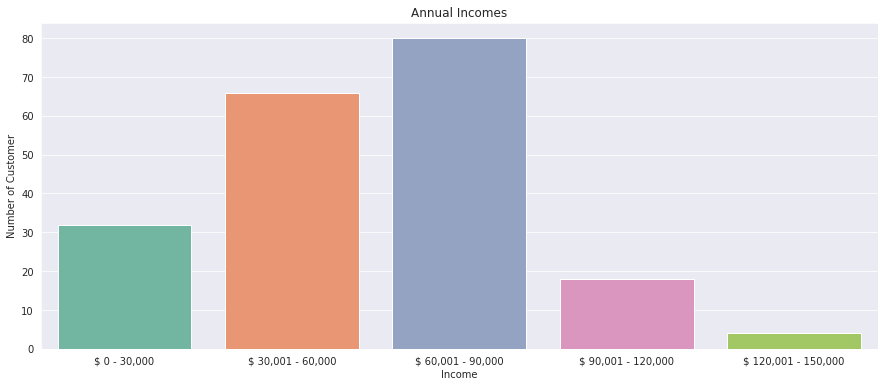

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

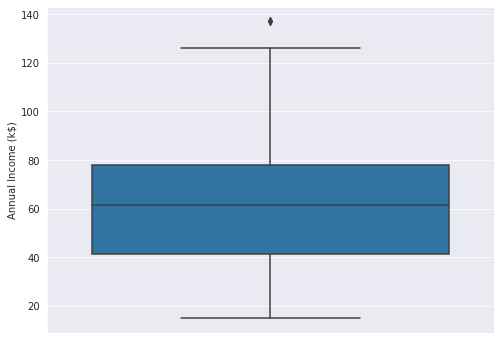

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot()
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

Như vậy thu nhập hàng năm của khách hàng phần lớn trong khoảng từ 60000 - 90000. Thu nhập thấp nhất là 15000 và cao nhất là 137000 trung bình là 60560

##1.3 Quan sát thuộc tính điểm chi tiêu của khách hàng

Thuộc tính điểm chi tiêu của khách hàng được tính dựa trên hành vi mua sắm tại trug tâm trên thang điểm 1-100.

Thuộc tính này cho biết khả năng chi tiêu cho các mặt hàng của trung tâm thương mại. Điểm chi tiêu càng cao khách hàng càng tiêu nhiều tiền vào việc mua sắm ở trung tâm thương mại

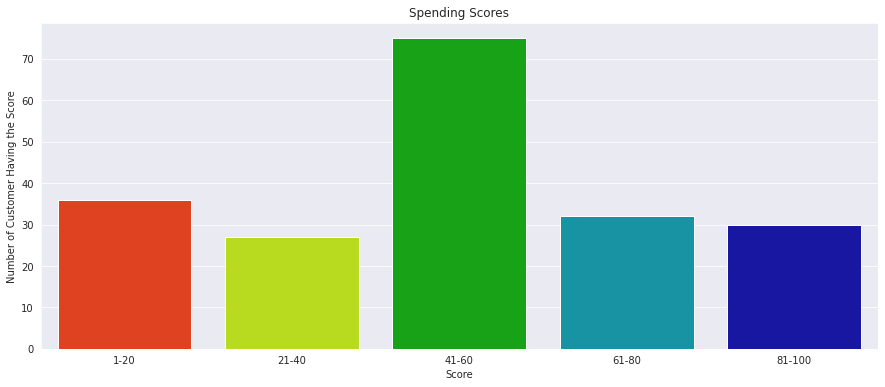

In [ ]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

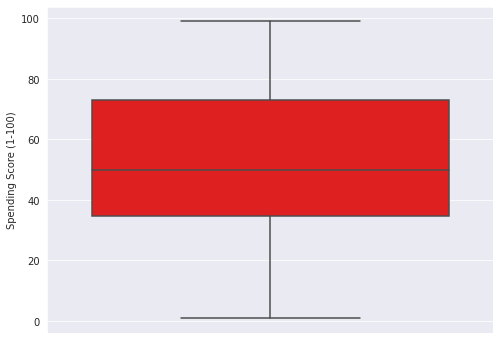

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot()
sns.boxplot(y=df["Spending Score (1-100)"], color="red")

Như vậy điểm chi tiêu của khách hàng phần lớn trong khoảng từ 41-60 điểm. Điểm thấp nhất là 1 và cao nhất là 99 trung bình là 50,2

##1.4 Quan sát thuộc tính giới tính

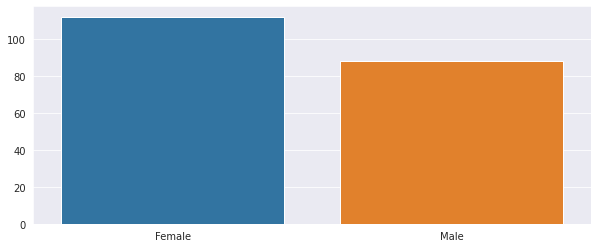

In [ ]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

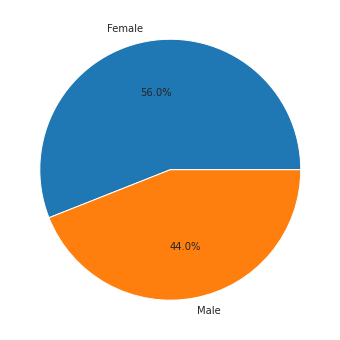

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot()
plt.pie(genders.values,labels=genders.index,autopct='%1.1f%%')
plt.show()

Khách hàng là nữ giới đông hơn nam giới. Nữ giới chiếm 56% và nam giới là 44%

#2.Tiến hành phân cụm tập dữ liệu

## 2.1 Sử dụng phương pháp khửu tay tìm số cụm tối ưu

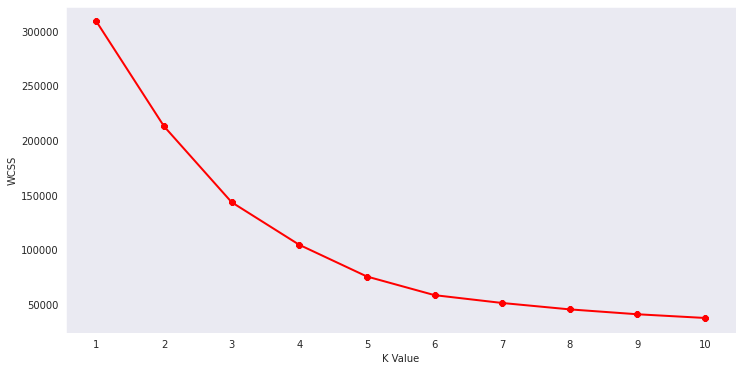

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Từ biểu đồ trên theo phương pháp khửu tay ta thấy số lượng cụm thích hợp trong khoảng 5-7 tốt nhất

##2.2 Tiến hành phân cụm dữ liệu theo số lượng cụm phía trên

Với k=5. Phân chia tập dữ liệu thành 5 cụm

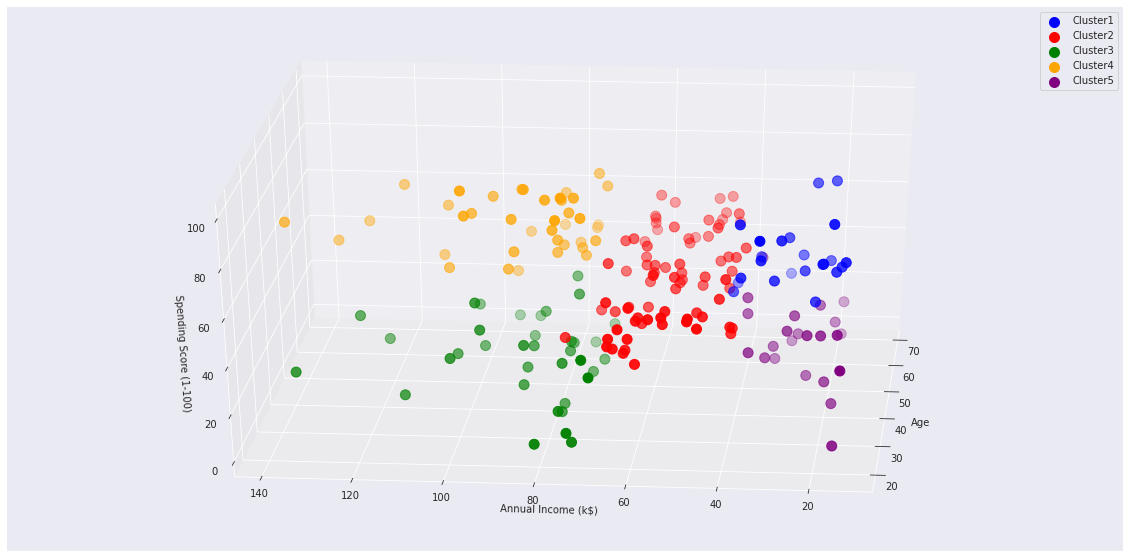

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=100,label='Cluster1')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=100,label='Cluster2')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=100,label='Cluster3')
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=100,label='Cluster4')
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=100,label='Cluster5')
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()


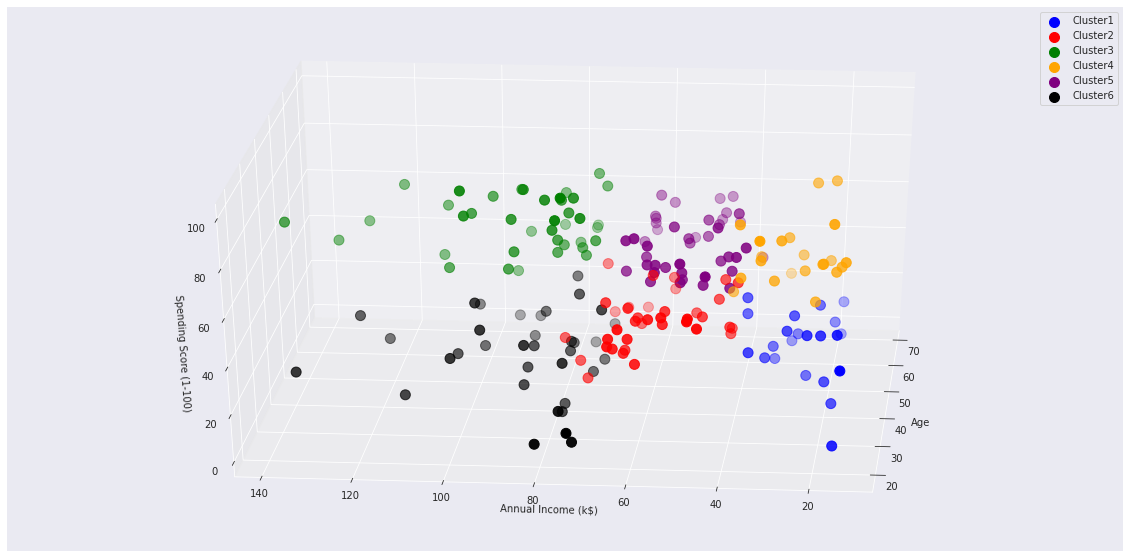

In [ ]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=100,label='Cluster1')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=100,label='Cluster2')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=100,label='Cluster3')
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=100,label='Cluster4')
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=100,label='Cluster5')
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='black', s=100,label='Cluster6')
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

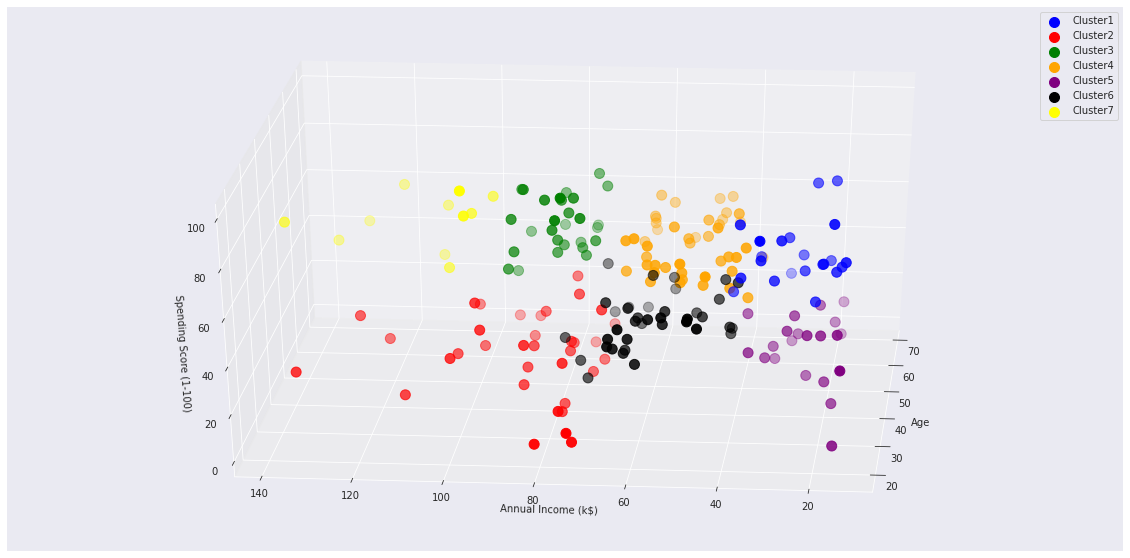

In [ ]:
km = KMeans(n_clusters=7)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=100,label='Cluster1')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=100,label='Cluster2')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=100,label='Cluster3')
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=100,label='Cluster4')
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=100,label='Cluster5')
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='black', s=100,label='Cluster6')
ax.scatter(df.Age[df.label == 6], df["Annual Income (k$)"][df.label == 6], df["Spending Score (1-100)"][df.label == 6], c='yellow', s=100,label='Cluster7')

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

#3.Kết quả thu được

In [ ]:
df1=df[df.label== 0]
print(df1)
print(df1.describe())

    Gender  Age  Annual Income (k$)  Spending Score (1-100)  label
1     Male   21                  15                      81      0
3   Female   23                  16                      77      0
5   Female   22                  17                      76      0
7   Female   23                  18                      94      0
9   Female   30                  19                      72      0
11  Female   35                  19                      99      0
13  Female   24                  20                      77      0
15    Male   22                  20                      79      0
17    Male   20                  21                      66      0
19  Female   35                  23                      98      0
21    Male   25                  24                      73      0
23    Male   31                  25                      73      0
25    Male   29                  28                      82      0
27    Male   35                  28                      61   

Nhóm 1: Gồm 23 người, nhóm có thu nhập hàng năm thấp, điểm chi tiêu cũng thấp và độ tuổi, đa số khách hàng có độ tuổi từ 45-55 tuổi

In [ ]:
df2=df[df.label== 1]
print(df2)
print(df2.describe())

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  label
46   Female   50                  40                      55      1
47   Female   27                  40                      47      1
48   Female   29                  40                      42      1
49   Female   31                  40                      42      1
50   Female   49                  42                      52      1
..      ...  ...                 ...                     ...    ...
120    Male   27                  67                      56      1
121  Female   38                  67                      40      1
122  Female   40                  69                      58      1
126    Male   43                  71                      35      1
142  Female   28                  76                      40      1

[79 rows x 5 columns]
             Age  Annual Income (k$)  Spending Score (1-100)  label
count  79.000000           79.000000               79.000000   79.0
mean   43.088608         

Nhóm 2: Gồm 39 người, là nhóm có thu nhập hàng năm cao và điểm chi tiêu cũng cao, đa số độ tuổi của khách hàng thuộc khoảng 30-35 tuổi

In [ ]:
df3=df[df.label== 2]
print(df3)
print(df3.describe())

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  label
124  Female   23                  70                      29      2
128    Male   59                  71                      11      2
130    Male   47                  71                       9      2
132  Female   25                  72                      34      2
134    Male   20                  73                       5      2
136  Female   44                  73                       7      2
138    Male   19                  74                      10      2
140  Female   57                  75                       5      2
144    Male   25                  77                      12      2
146    Male   48                  77                      36      2
148  Female   34                  78                      22      2
150    Male   43                  78                      17      2
152  Female   44                  78                      20      2
154  Female   47                  78            

Nhóm 3: Gồm 36 khách hàng, là nhóm khách hàng có thu nhập hàng năm cao nhưng điểm chi tiêu lại thấp, độ tuổi khách hàng chủ yếu ở 45-50 tuổi

In [ ]:
df4=df[df.label== 3]
print(df4)
print(df4.describe())

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  label
123    Male   39                  69                      91      3
125  Female   31                  70                      77      3
127    Male   40                  71                      95      3
129    Male   38                  71                      75      3
131    Male   39                  71                      75      3
133  Female   31                  72                      71      3
135  Female   29                  73                      88      3
137    Male   32                  73                      73      3
139  Female   35                  74                      72      3
141    Male   32                  75                      93      3
143  Female   32                  76                      87      3
145    Male   28                  77                      97      3
147  Female   32                  77                      74      3
149    Male   34                  78            

Nhóm 4: Bao gồm 22 khách hàng, là những khách hàng có thu nhập hàng năm thấp nhưng điểm chi tiêu lại rất cao, họ thường là những người trẻ khoảng 20-25 tuổi

In [ ]:
df5=df[df.label== 4]
print(df5)
print(df5.describe())

    Gender  Age  Annual Income (k$)  Spending Score (1-100)  label
0     Male   19                  15                      39      4
2   Female   20                  16                       6      4
4   Female   31                  17                      40      4
6   Female   35                  18                       6      4
8     Male   64                  19                       3      4
10    Male   67                  19                      14      4
12  Female   58                  20                      15      4
14    Male   37                  20                      13      4
16  Female   35                  21                      35      4
18    Male   52                  23                      29      4
20    Male   35                  24                      35      4
22  Female   46                  25                       5      4
24  Female   54                  28                      14      4
26  Female   45                  28                      32   

Nhóm 5: Gồm 80 người, nhóm này bao gồm khách hàng có mức thu nhập hàng năm trung bình và điểm chi tiêu cũng thuộc mức trung bình

Như vậy từ kết quả phân nhóm trên, trung tâm thương mại hoàn toàn đưa ra những chiến lược khuyến mại hoặc thu hút khách hàng riêng biệt phù hợp cho từng nhóm.

Ví dụ đối với nhóm 3 ta có thể tìm hiểu nhiều hơn thói quen mua hàng của khách, có những biện pháp kích thích mua hàng 

đối với nhóm 2 và 4 có thể có những chiến lược ưu đãi để chăm sóc khách hàng

...